Aufgabe 46.

Im Datensatz `engel` finden Sie Daten zur Beziehung zwischen Einkommen (income)
und Ausgaben für Nahrungsmittel (foodexp) in belgischen Haushalten. Ziel ist es, zu
untersuchen, ob sich ein linearer Zusammenhang zwischen Einkommen und Nahrungsmittelausgaben feststellen lässt und ob das geschätzte Modell die Grundannahmen der
linearen Regression erfüllt.

In [25]:
import pandas as pd
from utils import *
from statsmodels.api import OLS, add_constant
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f

In [26]:
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)
healthy_orange = '#EC6602'
healthy_orange_50 = '#F9B591'
healthy_orange_25 = '#FDDDCB'
siemens_petrol = '#009999'
siemens_petrol_50 = '#87D2D2'
sns.set_palette([healthy_orange, siemens_petrol, healthy_orange_50, healthy_orange_25, siemens_petrol_50])
RANDOM_SEED = 42

In [27]:
df = pd.read_csv('../data/engel.csv')
df.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


a) Stellen Sie die Beziehung zwischen Einkommen und Ausgaben grafisch dar (Scatterplot mit Regressionsgerade). Passen Sie ein lineares Modell an. Welche Ausgaben würden Sie für ein Einkommen von 4000 erwarten?

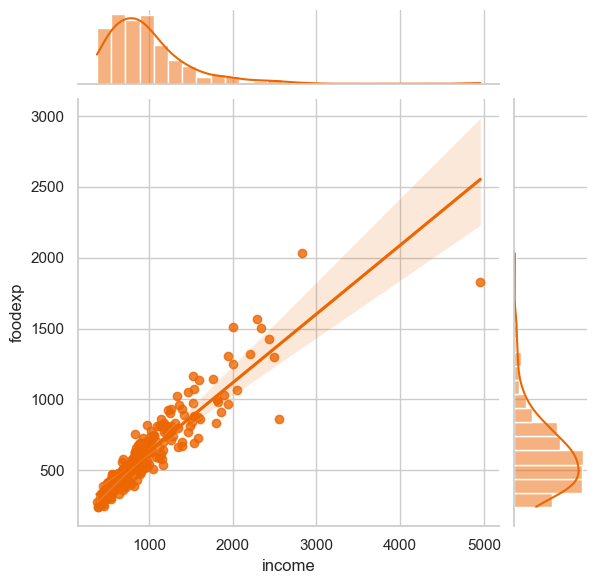

In [28]:
sns.jointplot(x='income', y='foodexp', data=df, kind='reg');

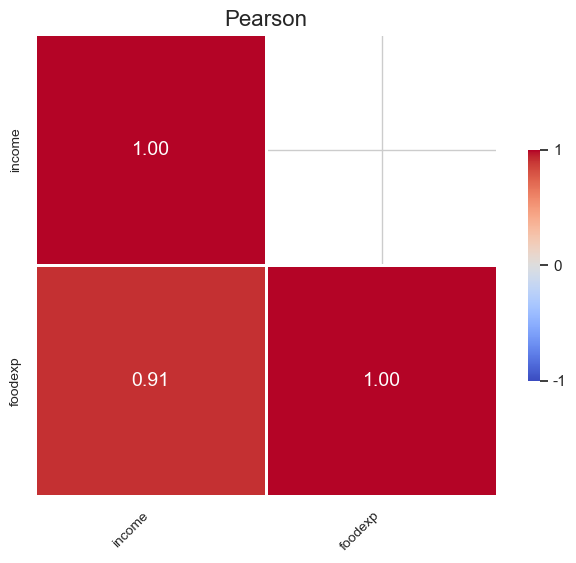

In [29]:
num_corr_heatmap(df.corr())

In [30]:
df.shape

(235, 2)

In [31]:
df.describe()

,income,foodexp
count,235.000000,235.000000
mean,982.473044,624.150111
std,519.230879,276.456997
min,377.058369,242.320202
25%,638.875788,429.688763
50%,883.984917,582.541251
75%,1163.986672,743.881432
max,4957.813024,2032.679190


In [32]:
X = add_constant(df[['income']])
y = df['foodexp']
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                foodexp   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1141.
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           9.92e-92
Time:                        20:35:45   Log-Likelihood:                -1445.7
No. Observations:                 235   AIC:                             2895.
Df Residuals:                     233   BIC:                             2902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.4754     15.957      9.242      0.0

In [33]:
model.predict([1, 4000])

array([2088.18908323])

b) Erzeugen Sie einen Residuenplot (Residuen gegen vorhergesagte Werte). Was fällt
Ihnen auf? Welche Modellannahme ist möglicherweise verletzt?

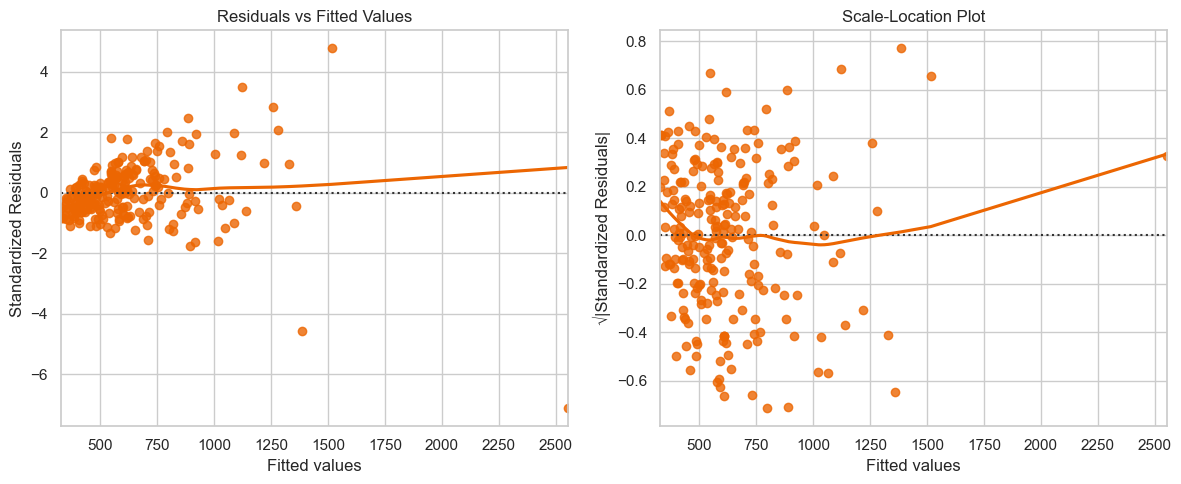

Breusch-Pagan test statistic: p-value = 0.0000
F-statistic: p-value = 0.0000
ARCH test statistic: p-value = 0.6858
F-statistic: p-value = 0.6965
White test statistic: p-value = 0.0000
F-statistic: p-value = 0.0000
Goldfeld-Quandt test statistic: p-value = 0.2165


In [34]:
check_homoscedasticity(model);

> Homoskedastizitätsannahme

c) Prüfen Sie beide bisherigen Plots auf mögliche Ausreißer oder High-Leverage Punkte. Wie würde sich das Entfernen solcher Punkte auf den geschätzten Zusammenhang auswirken?

In [11]:
# das Problem kommt erst ab Einkommen von 2500

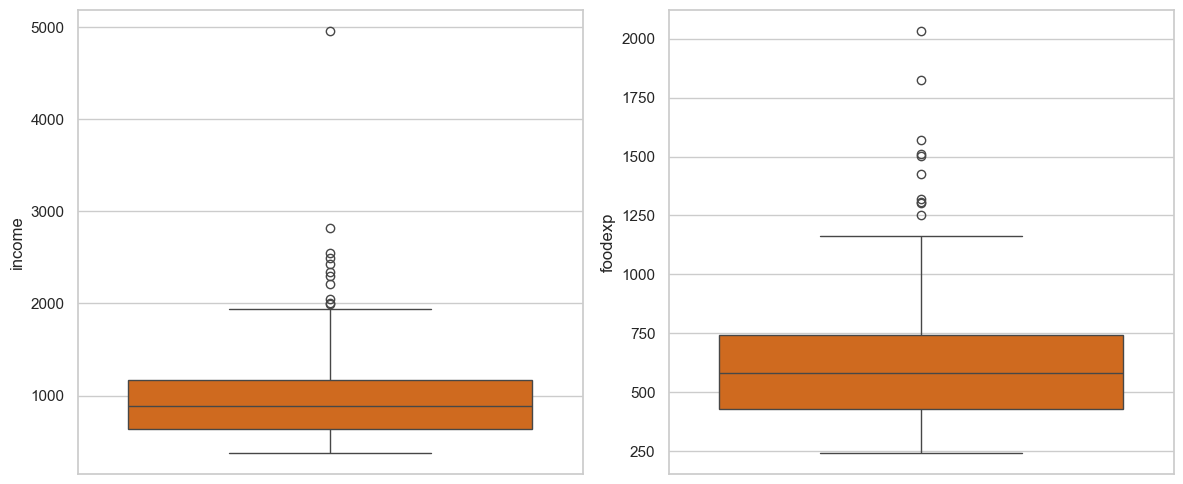

In [12]:
_, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(df.income, ax=axes[0])
sns.boxplot(df.foodexp, ax=axes[1]);
plt.tight_layout()
plt.show()

In [13]:
show_outliers(df.income).sort_values()

148    1999.255220
127    2008.854624
48     2051.178941
219    2208.789706
60     2293.191971
118    2340.617354
154    2432.390992
124    2497.785954
104    2551.661514
58     2822.533035
137    4957.813024
Name: income, dtype: float64

In [14]:
# nimm 104, 58, 137 raus 

In [15]:
show_outliers(df.foodexp).sort_values()

148    1250.964334
124    1301.145098
213    1305.720141
219    1318.803282
154    1424.804656
118    1504.370775
127    1509.781172
60     1570.391138
137    1827.199964
58     2032.679190
Name: foodexp, dtype: float64

In [16]:
# nimm 137 und 58 raus

In [17]:
df = df.loc[~(df.index.isin([58, 137, 104]))]

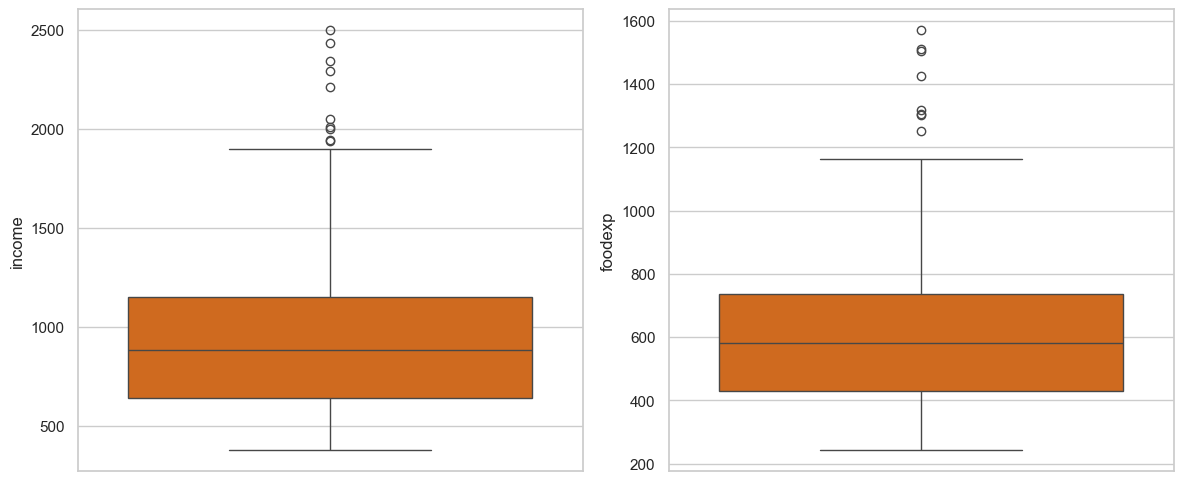

In [18]:
_, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(df.income, ax=axes[0])
sns.boxplot(df.foodexp, ax=axes[1]);
plt.tight_layout()
plt.show()

In [19]:
X = add_constant(df[['income']])
y = df['foodexp']
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                foodexp   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1626.
Date:                Sat, 07 Jun 2025   Prob (F-statistic):          2.89e-106
Time:                        20:34:53   Log-Likelihood:                -1366.8
No. Observations:                 232   AIC:                             2738.
Df Residuals:                     230   BIC:                             2745.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.5391     14.250      6.073      0.0

d) Zeichnen Sie ein Histogramm der Residuen. Würden Sie auf Basis dieser Darstellung sagen, dass die Residuen normalverteilt sind?

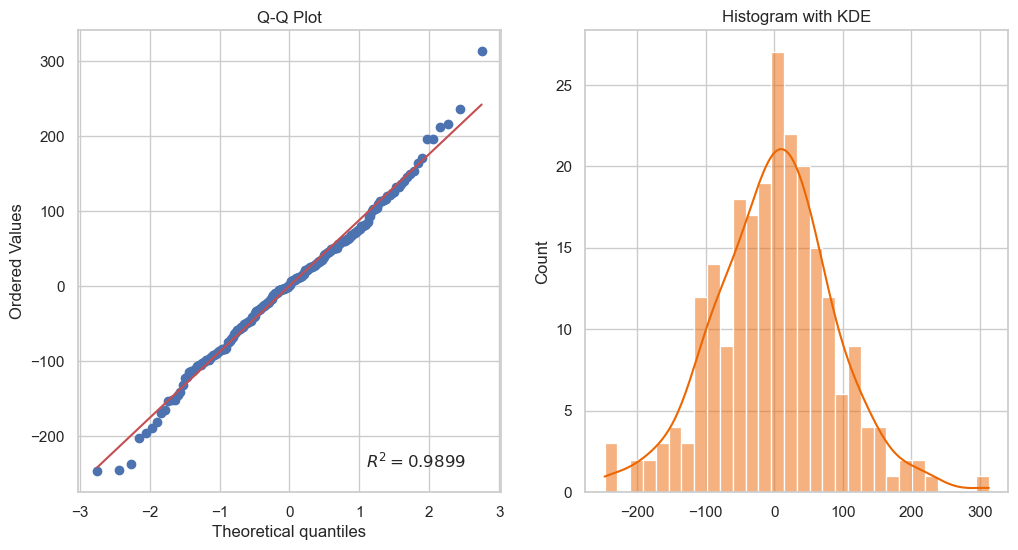

Shapiro-Wilk normality test: p-value = 0.2070
D'Agostino's K^2 normality test: p-value = 0.1257
Kolmogorov-Smirnov normality test: p-value = 0.8291
Anderson-Darling normality test: statistic = 0.5270, critical value = 0.7740


In [20]:
check_normality(model.resid)

In [21]:
# Ja

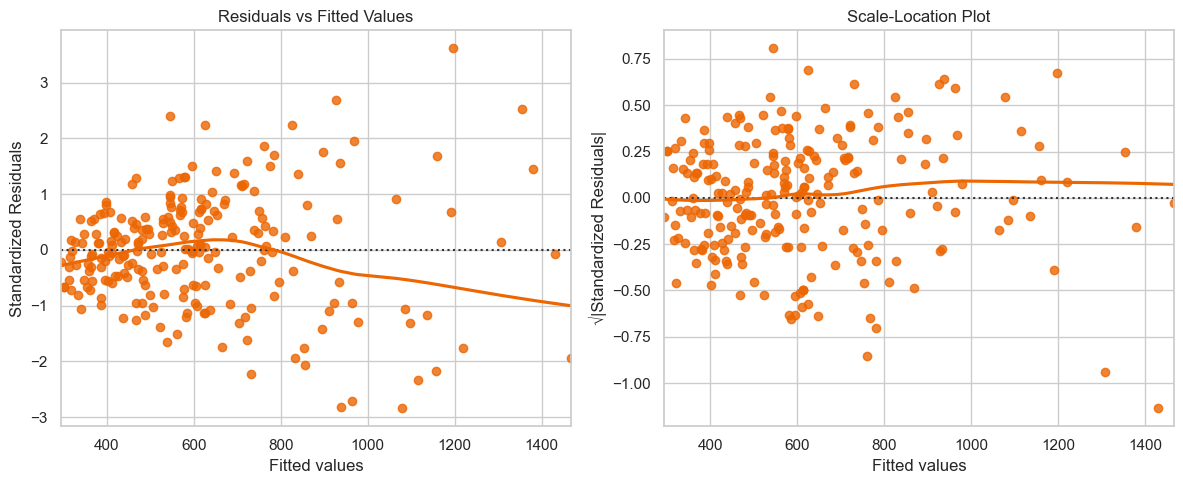

Breusch-Pagan test statistic: p-value = 0.0000
F-statistic: p-value = 0.0000
ARCH test statistic: p-value = 0.0020
F-statistic: p-value = 0.0014
White test statistic: p-value = 0.0000
F-statistic: p-value = 0.0000
Goldfeld-Quandt test statistic: p-value = 0.2987


In [24]:
check_homoscedasticity(model);

In [80]:
# das Entfernen von den 3 Punkten hat die Normalverteilung der Residuen verbessert ABER homoskedastizität ist immer noch ein Problem

In [83]:
print(model.get_robustcov_results(cov_type='HC0').summary())

                            OLS Regression Results                            
Dep. Variable:                foodexp   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     785.2
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           4.16e-76
Time:                        15:19:00   Log-Likelihood:                -1366.8
No. Observations:                 232   AIC:                             2738.
Df Residuals:                     230   BIC:                             2745.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.5391     16.014      5.404      0.0

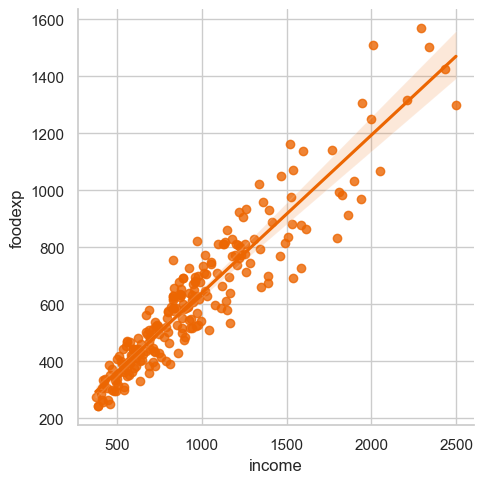

In [87]:
sns.lmplot(x='income', y='foodexp', data=df, robust=True);

e) Recherchieren Sie die Funktion qqplot() aus statsmodels.graphics.gofplots in der offiziellen Python-Dokumentation. Welche Optionen bietet das Argument line? Was ist jeweils ihre Bedeutung? Probieren Sie nun folgende Varianten aus und beschreiben Sie jeweils, was Sie beobachten:
- qqplot(residuals, line=None)
- qqplot(residuals, line='45')
- qqplot(residuals, line='s')

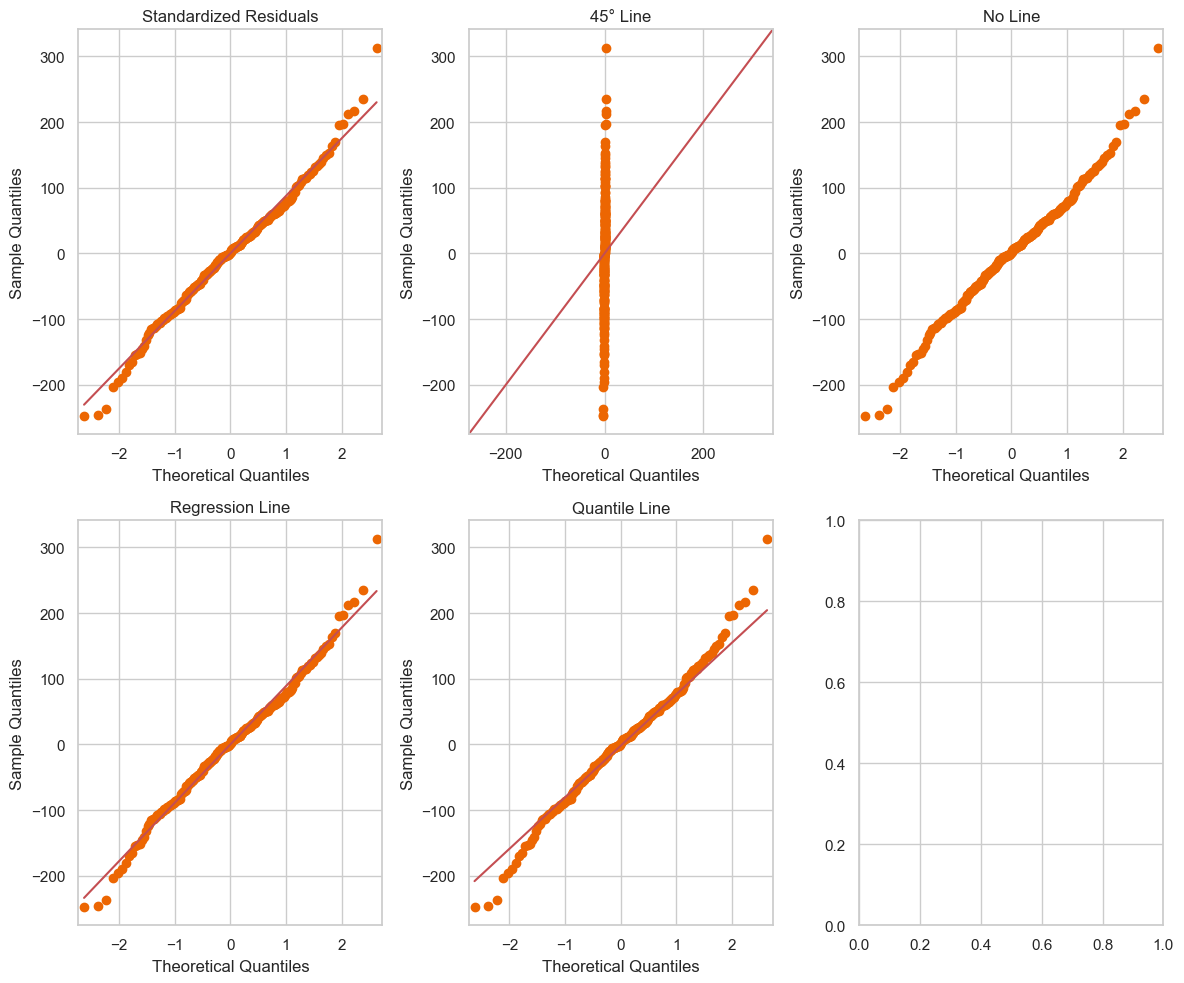

In [88]:
from statsmodels.graphics.gofplots import qqplot
fig, ax = plt.subplots(2, 3, figsize=(12, 10))
ax = ax.flatten()
qqplot(model.resid, line='s', ax=ax[0], label='Standardized Residuals');
ax[0].set_title('Standardized Residuals')
qqplot(model.resid, line='45', ax=ax[1], label='45° Line');
ax[1].set_title('45° Line')
qqplot(model.resid, line=None, ax=ax[2], label='No Line');
ax[2].set_title('No Line')
qqplot(model.resid, line='r', ax=ax[3], label='Regression Line');
ax[3].set_title('Regression Line')
qqplot(model.resid, line='q', ax=ax[4], label='Quantile Line');
ax[4].set_title('Quantile Line')
plt.tight_layout()
plt.show()

f) Standardisieren Sie die Residuen mit zscore() (from scipy.stats import zscore) und erstellen Sie den QQ-Plot erneut mit line='45'. Warum ergibt sich nun ein anderes Bild?

In [89]:
from scipy.stats import zscore
df['z_resid'] = zscore(model.resid)
df.head()

,income,foodexp,z_resid
0,420.157651,255.839425,-0.717925
1,541.411707,310.958667,-0.853629
2,901.157457,485.680014,-1.128487
3,639.080229,402.997356,-0.418976
4,750.875606,495.560775,-0.067464


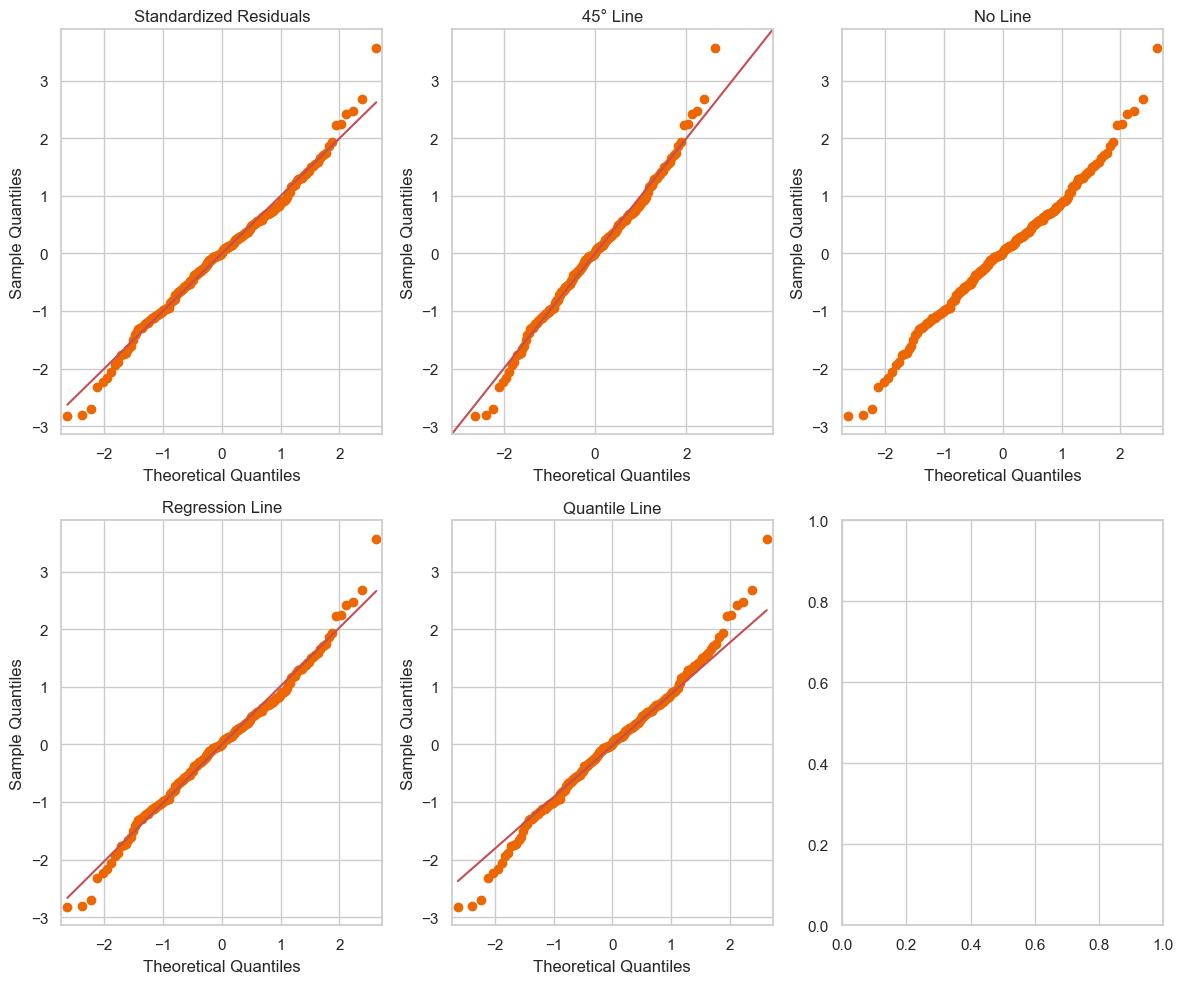

In [90]:
fig, ax = plt.subplots(2, 3, figsize=(12, 10))
ax = ax.flatten()
qqplot(df.z_resid, line='s', ax=ax[0], label='Standardized Residuals');
ax[0].set_title('Standardized Residuals')
qqplot(df.z_resid, line='45', ax=ax[1], label='45° Line');
ax[1].set_title('45° Line')
qqplot(df.z_resid, line=None, ax=ax[2], label='No Line');
ax[2].set_title('No Line')
qqplot(df.z_resid, line='r', ax=ax[3], label='Regression Line');
ax[3].set_title('Regression Line')
qqplot(df.z_resid, line='q', ax=ax[4], label='Quantile Line');
ax[4].set_title('Quantile Line')
plt.tight_layout()
plt.show()

“45”: Die x=y Gerade, aber macht nur Sinn wenn unsere Daten und theoretische Quantile die gleiche Verteilungsparameter haben. Wenn theoretische Quantile standard normalverteilt sind, dann müssen wir unsere Daten z-standardisieren.

“s”: Theoretische Quantile von der Standard Normalverteilung sind verglichen mit der Normalverteilung unserer Daten mit ihren eigenen Parameter und eine Gerade ist angepasst. Solange die Skala von den beiden Verteilungen unterschiedlich sind, eine x=y Gerade ist nicht zu erwarten.

“r”: Anscheinend ist es genau das gleiche wie "s"

“q”: Hier werden nur die Quantile direkt verwendet

g) Formulieren Sie eine Empfehlung: Welche line-Option ist für welchen Zweck am besten geeignet? Welche Interpretation ergibt sich daraus für die ursprüngliche Frage, ob die Residuen hier normalverteilt sind?

Ich glaube in den meisten Fallen das Argument "s" wenn man einfach qq-plot plotten möchte um mit standard Normalverteilung zu vergleichen, man kann aber auch "45" mit fit=True benutzen, da bekommt man eine 45 Gerade was schöner aussieht. Man könnte auch die Verteilung und ihre Parameter selber angeben und dann "45" benutzen ohne es fitten zu müssen.